#        Blindness Detection Severity of Diabetic Retinopathy
                               
                   Date Due: 2nd December at 1.00 PM
                                            
            ------------------------------------------------

                   Team Members:                 Z-ID:

                   Sandesh Reddy Pendyala        Z1859176
                   
                   Sneha Ravi Chandran           Z1856678

                   Priyanjani Chandra            Z1864520
                          
                   Sindhusha Devi Parimi         Z1855951

     

Programmer: Sandesh Reddy Pendyala

Purpose: Did the initial data preprocessing. Had to process the data into a directory system 
that involved in splitting of the images grouped in accordance with its class labels into its
respective folders which makes it compatible to run with the various models we had chosen to build.  

In [4]:
# Importing Tensorflow and keras libraries and packages necessary to build the model
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# reading the csv into a pandas DataFrame
df = pd.read_csv('D:\\Fall_2019\\Neural_Networks\\Blindness Detection\\train.csv')  

# displaying the dataframe
df

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0
...,...,...
3657,ffa47f6a7bf4,2
3658,ffc04fed30e6,0
3659,ffcf7b45f213,2
3660,ffd97f8cd5aa,0


In [3]:
# group the dataframe df by the class label
group = df.groupby('diagnosis')                                           
df2 = group.apply(lambda x: x['id_code'].unique())  

# printing the grouped dataframe df2
df2

diagnosis
0    [002c21358ce6, 005b95c28852, 0097f532ac9f, 00c...
1    [0024cdab0c1e, 00cb6555d108, 0124dffecf29, 01b...
2    [000c1434d8d7, 00a8624548a9, 00b74780d31d, 00e...
3    [0104b032c141, 03c85870824c, 042470a92154, 05c...
4    [001639a390f0, 0083ee8054ee, 0243404e8a00, 026...
dtype: object

In [4]:
# returning the numpy array representation of the given series object
df2 = df2.apply(pd.Series)
df2

,0,1,2,3,4,5,6,7,8,9,...,1795,1796,1797,1798,1799,1800,1801,1802,1803,1804
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,002c21358ce6,005b95c28852,0097f532ac9f,00cc2b75cddd,00f6c1be5a33,0125fbd2e791,014508ccb9cb,0151781fe50b,0182152c50de,01d9477b1171,...,fefded6bf135,ff03f74667df,ff1e940105f9,ff4832d55461,ff4955e76894,ff4cd992667b,ff59d44a70a7,ff631653374e,ffc04fed30e6,ffd97f8cd5aa
1,0024cdab0c1e,00cb6555d108,0124dffecf29,01b3aed3ed4c,0369f3efe69b,03e25101e8e8,04ac765f91a1,059bc89df7f4,05a5183c92d0,0684311afdfc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000c1434d8d7,00a8624548a9,00b74780d31d,00e4ddff966a,012a242ac6ff,0161338f53cc,0180bfa26c0b,01c7808d901d,01eb826f6467,025a169a0bb0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0104b032c141,03c85870824c,042470a92154,05cd0178ccfe,069f43616fab,070f67572d03,07a0e34c8d20,093a42649c29,0c917c372572,0cb14014117d,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,001639a390f0,0083ee8054ee,0243404e8a00,02685f13cefd,02dda30d3acf,0318598cfd16,034cb07a550f,03a7f4a5786f,07122e268a1d,080ee76c958c,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# creating separate csv files grouped with respect to the class labels
for i, g in df.groupby('diagnosis'):
    g.to_csv('{}.csv'.format(i), header=False, index_label=False)

# swapping the rows and columns
df2= df2.swapaxes("index", "columns")
df2

diagnosis,0,1,2,3,4
0,002c21358ce6,0024cdab0c1e,000c1434d8d7,0104b032c141,001639a390f0
1,005b95c28852,00cb6555d108,00a8624548a9,03c85870824c,0083ee8054ee
2,0097f532ac9f,0124dffecf29,00b74780d31d,042470a92154,0243404e8a00
3,00cc2b75cddd,01b3aed3ed4c,00e4ddff966a,05cd0178ccfe,02685f13cefd
4,00f6c1be5a33,0369f3efe69b,012a242ac6ff,069f43616fab,02dda30d3acf
...,...,...,...,...,...
1800,ff4cd992667b,NaN,NaN,NaN,NaN
1801,ff59d44a70a7,NaN,NaN,NaN,NaN
1802,ff631653374e,NaN,NaN,NaN,NaN
1803,ffc04fed30e6,NaN,NaN,NaN,NaN


In [5]:
import shutil as sh

# path mentioned for storing the grouped images in with respect to the class labels
path = "C:\\Users\\sneha\\Desktop\\NeuralNetworks\\split_old\\"

# source path of the training images
path_img = "D:\\Fall_2019\\Neural_Networks\\Blindness Detection\\train_images\\" 

In [ ]:
'''
Iterate through the each of the class label value and its corresponding images grouped under that label.
Append the path with the name of the folder as the class label name.
In our case, based on the severity the labels are grouped as,
0 - No DR
1 - Mild
2 - Moderate
3 - Severe
4 - Proliferative DR

Each of these label folder will now have the images grouped under that category after iterating 
through the its repective values.
'''
for (col, colData) in df2.iteritems(): 

    new_path = path + str(col)
    os.mkdir(new_path)
    #print(type(data))      # type is string

    for data in colData.values:
        try:
            data = str(data)
            if data!= 'NaN':
                sh.copy(path_img + str(data) +'.png' , new_path)
            #print(type(data))
        except FileNotFoundError:
            continue

In [7]:
# printing the dataframe information to know how many value are there for each class
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1805 entries, 0 to 1804
Data columns (total 5 columns):
0    1805 non-null object
1    370 non-null object
2    999 non-null object
3    193 non-null object
4    295 non-null object
dtypes: object(5)
memory usage: 70.6+ KB


### Visualization of the original class labels

Programmer: Sneha Ravi Chandran

Purpose: Visualizing the original class labels using matplotlib. Each of the images are grouped under their respective classes. Implemented the count_images method to calculate the image count in each directory.

In [2]:
'''For counting the number of images in each class for a given directory and return them in a list'''
def count_images(path, classes):
    count = []
    for c in classes:
        label_path= os.path.join(path, c)
        image_cnt = len([f for f in os.listdir(label_path)if os.path.isfile(os.path.join(label_path, f))])
        count.append(image_cnt)
    return count

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting the images grouped under each labels

def plot_class(y):
    plt.style.use('ggplot')
    plt.figure(figsize = (12,7))

    x = ['0- No DR', '1- Mild', '2- Moderate', '3- Severe', '4- Proliferative DR']

    x_pos = [i for i, _ in enumerate(x)]

    plt.bar(x_pos, y, color='green')
    plt.xlabel("Class", fontsize=15)
    plt.ylabel("Count", fontsize=15)
    plt.title("Severity of Diabetic Retinopathy(DR)", fontsize=25)

    plt.xticks(x_pos, x)

    plt.show()

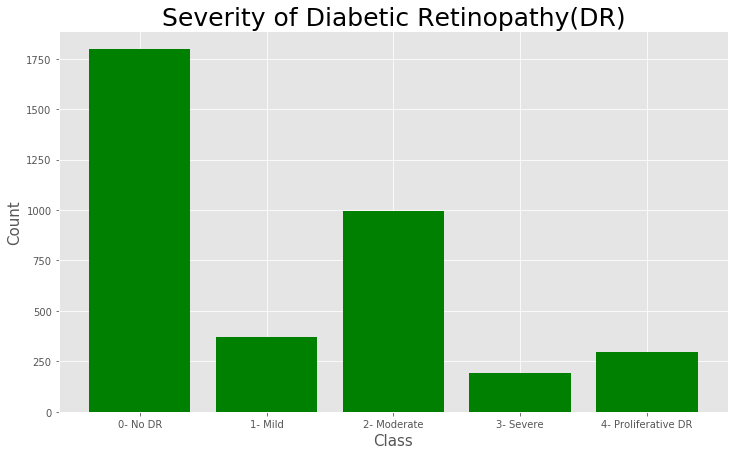

In [8]:
classes = ['0', '1', '2', '3', '4']
y = count_images(path, classes)
plot_class(y)

# Splitting the dataset into Train, Validation and Test

Programmer: Priyanjani Chandra

Purpose: Taking the file system and split it up further into training, test and validation data sets. Also implemented the code for writing test image names and their labels into a CSV file.

In [9]:
import os
import numpy as np
import shutil
# Setting the path to the original dataset
img_dir="C:\\Users\\sneha\\Desktop\\NeuralNetworks\\split\\"

In [10]:
# Create folders for training data and validation randomly splitted 
os.mkdir("old_train_1")
os.mkdir("old_test")
os.mkdir("old_train")
os.mkdir("old_valid")

In [11]:
# Assigning the directory paths
old_train_dir_1 = "old_train_1/"
old_test_dir =  "old_test/"
old_train_dir = "old_train/"
old_valid_dir = "old_valid/"

In [12]:
# Get all the classes from the original train directory
classes = os.listdir(img_dir) 

In [13]:
# Create target folders in the new train data directory
for c in classes:
    os.mkdir(old_train_dir+c)
    os.mkdir(old_valid_dir+c)
    os.mkdir(old_train_dir_1+c)
    os.mkdir(old_test_dir+c)

In [15]:
classes

['0', '1', '2', '3', '4']

In [17]:
'''
Randomly splitting the dataset into 80% as training and 20% as validation.
Storing them into separate folder of train and test with class labels folder 
grouped under each of them.
'''
def split_dataset(path, classes, new_train_dir, new_test_dir):
   
    for images in classes:
        # images correspond to class labels
        class_root = path+images+'/'
        new_train = new_train_dir + images + '/'
        new_test = new_test_dir + images + '/'
        # list of images present in the path
        root_list = os.listdir(class_root)
        # Assigning the split size
        test_size = 0.85
        split_index = int(test_size*len(root_list))
        # Shuffling the images in each class
        np.random.shuffle(root_list)
        train_list = root_list[:split_index]
        test_list = root_list[split_index:]
        # Copying the images into training directories
        for final_image in train_list :
            source = class_root + final_image
            target = new_train + final_image
            sh.copy(source,target)
        # Copying the images into testing directories
        for final_image in test_list:
            source = class_root + final_image
            target = new_test + final_image
            sh.copy(source,target)

In [33]:
# Split the initial data to train and test sets
split_dataset(path, classes, old_train_dir_1, old_test_dir)

In [ ]:
'''Saving the image file names and classes for the test data in a csv file for final prediction '''

import csv

# Opening an empty CSV file
out_file=open('D:/Blindness Detection/new_test_labels.csv','w', newline='')
write=csv.writer(out_file)
write.writerow(['Filename', 'Label'])
label = 0
# walking through all the files in each sub directory i.e., classes
for path, dirs, files in os.walk("D:/Blindness Detection/New/new_test/"):
    for filename in files:
        write.writerow([filename, label-1])
    label+=1
# Clsing the file
out_file.close()

In [34]:
# Split the train data to train and validation sets
new_path = 'C:\\Users\\sneha\\Desktop\\NeuralNetworks\\New\\old_train_1\\'
split_dataset(new_path, classes, old_train_dir, old_valid_dir)

In [80]:
# Finding the total number of images in train, test and validation datasets
train_count = count_images('C:\\Users\\sneha\\Desktop\\NeuralNetworks\\New\\old_train\\', classes)
valid_count = count_images('C:\\Users\\sneha\\Desktop\\NeuralNetworks\\New\\old_valid\\', classes)
test_count = count_images('C:\\Users\\sneha\\Desktop\\NeuralNetworks\\New\\old_test\\', classes)

print('Number of images in train dataset:      ', sum(train_count))
print('Number of images in validation dataset: ', sum(valid_count))
print('Number of images in test dataset:       ', sum(test_count))

Number of images in train dataset:       2632
Number of images in validation dataset:  466
Number of images in test dataset:        550


### Visualizing the train, validation  and test dataset

Programmer: Sneha Ravi Chandran

Purpose: Visualizing the original train, validation and test dataset after split using matplotlib

In [23]:
# plotting the training and validation split ratio

def train_valid_plot(train_means, valid_means, test_means):
    labels = ['0- No DR', '1- Mild', '2- Moderate', '3- Severe', '4- Proliferative DR']

    x = np.arange(len(labels))  # the label locations
    width = 0.25  # the width of the bars

    fig, ax = plt.subplots(figsize=(12,7))
    rects1 = ax.bar(x - width, train_means, width, label='Train')
    rects2 = ax.bar(x , valid_means, width, label='Validation')
    rects3 = ax.bar(x + width, test_means, width, label='Test')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel("Class", fontsize=15)
    ax.set_ylabel('Count', fontsize=15)
    ax.set_title('DR Training Test Validation Split', fontsize=25)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
        
    fig.tight_layout()

    plt.show()

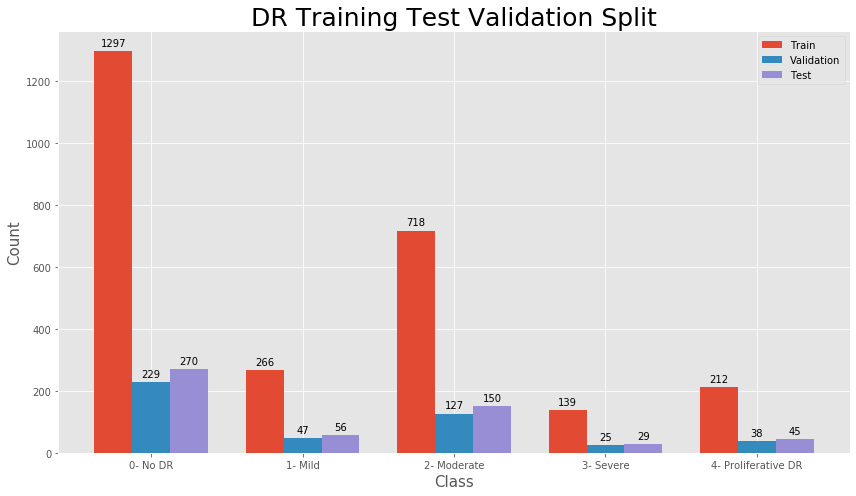

In [24]:
train_means = count_images('C:\\Users\\sneha\\Desktop\\NeuralNetworks\\New\\old_train\\', classes)
valid_means = count_images('C:\\Users\\sneha\\Desktop\\NeuralNetworks\\New\\old_valid\\', classes)
test_means = count_images('C:\\Users\\sneha\\Desktop\\NeuralNetworks\\New\\old_test\\', classes)
train_valid_plot(train_means, valid_means, test_means)

# Oversampling the minority classes

Programmer: Sindhusha Devi Parimi

Purpose: Augmented the data before we ran it for all the models. Implemented oversampling in an attempt to address the severe imbalance in classes in the data. This resulted in a marginal decrease in overall accuracy of the ImageNet models. 

In [ ]:
import pathlib
import matplotlib as plt
import re

image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

train_dir="C:\\Users\\sneha\\Desktop\\NeuralNetworks\\dummy\\"

data_dir = pathlib.Path(train_dir)

for file in data_dir.glob('*/*.png'):
    k = re.sub(r'\\', '/', str(file))
    save_here = 'C:\\Users\\sneha\\Desktop\\NeuralNetworks\\dummy\\3_new\\'
    print(k)
    #image_path = 'D:\\NN_Project\\New_folder\\expr\\1\\00cb6555d108.png'
    image = np.expand_dims(plt.pyplot.imread(k),0)

    image_gen_train.fit(image)

    for x, val in zip(image_gen_train.flow(image,                    #image we chose
            save_to_dir=save_here,     #this is where we figure out where to save
             save_prefix='aug',        # it will save the images as 'aug_0912' some number for every new augmented image
            save_format='png'),range(5)) :     # defining a range to augmented images
               pass


### Visualizing the oversampled dataset

Programmer: Sneha Ravi Chandran

Purpose: Visualizing the over sampled class labels using matplotlib

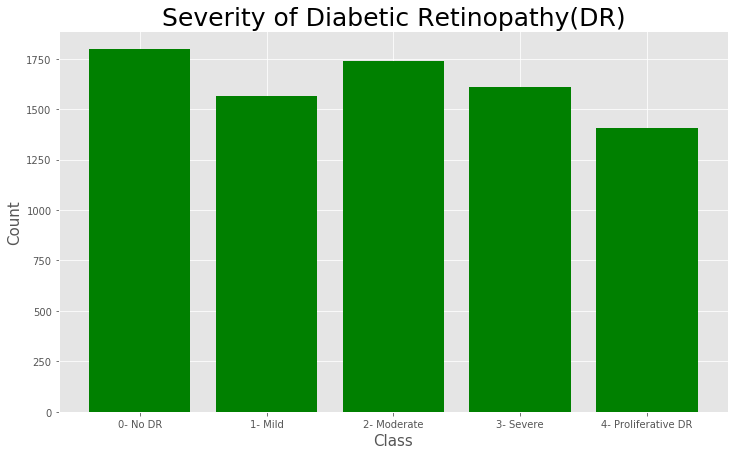

In [7]:
classes = ['0', '1', '2', '3', '4']
y = count_images("C:\\Users\\sneha\\Desktop\\NeuralNetworks\\split\\", classes)
plot_class(y)

# Splitting the over sampled dataset into Train, Validation

Programmer: Priyanjani Chandra

Purpose: Taking the file system and split it up further into training, test and validation data sets.

In [9]:
# Setting the path to the oversampled dataset
train_dir="C:\\Users\\sneha\\Desktop\\NeuralNetworks\\split\\"

In [10]:
# Create folders for training data and validation randomly splitted 
new_train = os.mkdir("new_train")
new_valid = os.mkdir("new_valid")

In [11]:
# Assigning the paths
new_train_dir = "new_train/"
new_valid_dir = "new_valid/"

In [12]:
# Get all the classes from the original train directory
classes = os.listdir(train_dir) 

In [13]:
# Create target folders in the new train data and new validation data directory
for c in classes:
    os.mkdir(new_train_dir+c)
    os.mkdir(new_valid_dir+c)

In [15]:
classes

['0', '1', '2', '3', '4']

In [ ]:
# Split the oversampled data to train and validation sets
split_dataset(train_dir, classes, new_train_dir, new_valid_dir)

In [81]:
# Finding the totoal number of images present in train and validation dataset
train_count = count_images('C:\\Users\\sneha\\Desktop\\NeuralNetworks\\new_train\\', classes)
valid_count = count_images('C:\\Users\\sneha\\Desktop\\NeuralNetworks\\new_valid\\', classes)
print('Number of images in train dataset:      ', sum(train_count))
print('Number of images in validation dataset: ', sum(valid_count))

Number of images in train dataset:       6488
Number of images in validation dataset:  1625


### Visualizing the train, validation dataset

Programmer: Sneha Ravi Chandran

Purpose: Visualizing the over sampled class labels for training and validation using matplotlib

In [15]:
# plotting the training and validation split ratio

def train_valid_plot(train_means, valid_means):
    labels = ['0- No DR', '1- Mild', '2- Moderate', '3- Severe', '4- Proliferative DR']

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(12,7))
    rects1 = ax.bar(x - width/2, train_means, width, label='Train')
    rects2 = ax.bar(x + width/2, valid_means, width, label='Validation')
    #rects3 = ax.bar(x + width/2, test_means, width, label='Test')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel("Class", fontsize=15)
    ax.set_ylabel('Count', fontsize=15)
    ax.set_title('DR Training Validation Split', fontsize=25)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    #autolabel(rects3)
        
    fig.tight_layout()

    plt.show()

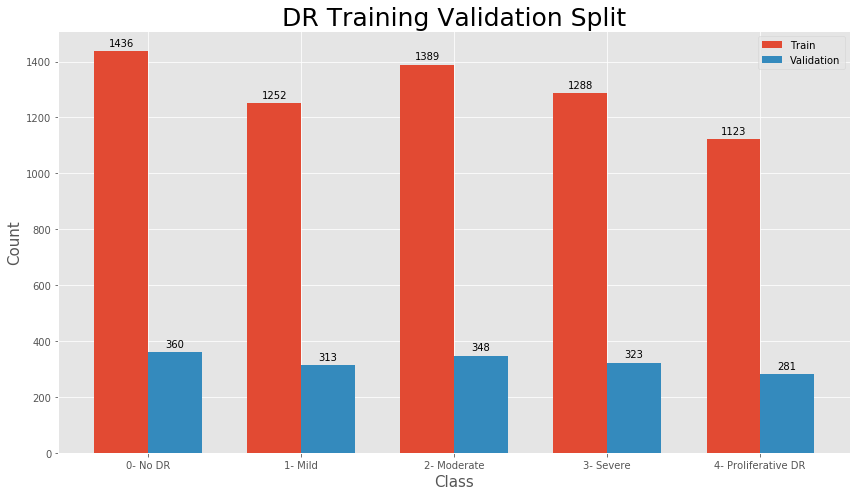

In [16]:
train_means = count_images('C:\\Users\\sneha\\Desktop\\NeuralNetworks\\new_train\\', classes)
valid_means = count_images('C:\\Users\\sneha\\Desktop\\NeuralNetworks\\new_valid\\', classes)
train_valid_plot(train_means, valid_means)